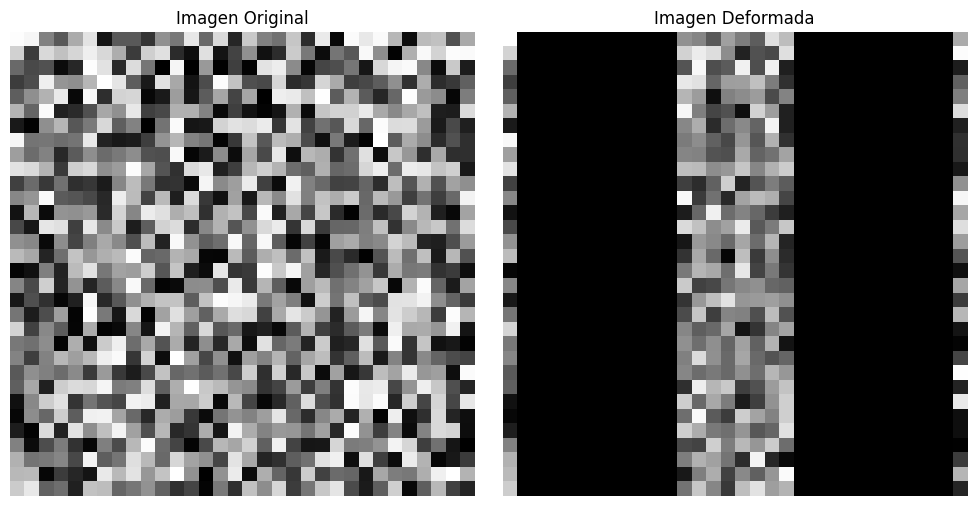

In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Imagen de entrada (1 canal, tamaño 32x32)
image = torch.rand(1, 1, 32, 32)

# Crear un grid deformado (campo de flujo)
N, C, H, W = image.size()
grid = F.affine_grid(torch.eye(2, 3).unsqueeze(0), image.size(), align_corners=True)
grid[..., 0] += torch.sin(torch.linspace(-3.14, 3.14, W)).unsqueeze(0).unsqueeze(0)

# Aplicar la deformación
warped_image = F.grid_sample(image, grid, align_corners=True)

# Convertir a numpy para visualización
original_image_np = image[0, 0].detach().cpu().numpy()
warped_image_np = warped_image[0, 0].detach().cpu().numpy()

# Visualización
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(original_image_np, cmap='gray')
ax[0].set_title("Imagen Original")
ax[0].axis('off')

ax[1].imshow(warped_image_np, cmap='gray')
ax[1].set_title("Imagen Deformada")
ax[1].axis('off')

plt.tight_layout()
plt.show()
